In [1]:
import os
from PIL import Image

train_dir = r"C:\Users\hp\Downloads\crop-disease-splitted-dataset\val"

print("✅ Started scanning the train dataset...")
folder_count = 0
total_images = 0
wrong_size_images = []

# Loop through all 39 folders (categories)
for folder_name in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder_name)
    if os.path.isdir(folder_path):
        folder_count += 1
        print(f"\n📂 Checking folder {folder_count}: {folder_name}...")
        image_count = 0

        # Loop through each image in the folder
        for image_file in os.listdir(folder_path):
            if image_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(folder_path, image_file)
                try:
                    img = Image.open(image_path)
                    w, h = img.size
                    image_count += 1
                    total_images += 1

                    # Check resolution
                    if (w, h) != (256, 256):
                        wrong_size_images.append((folder_name, image_file, (w, h)))

                    if image_count % 100 == 0:
                        print(f"   🔹 Processed {image_count} images in {folder_name}...")
                except Exception as e:
                    print(f"⚠️ Error in {image_file}: {e}")

print("\n✅ Scanning completed!")
print(f"📦 Total folders scanned: {folder_count}")
print(f"🖼️ Total images checked: {total_images}")
print(f"❌ Wrong size images found: {len(wrong_size_images)}")

if wrong_size_images:
    print("\nHere are first few wrong-size images:")
    for item in wrong_size_images[:10]:
        print(f"  {item[0]} → {item[1]} (Size: {item[2]})")
else:
    print("🎯 All images are correctly sized (256x256).")


✅ Started scanning the train dataset...

📂 Checking folder 1: Apple___Apple_scab...

📂 Checking folder 2: Apple___Black_rot...

📂 Checking folder 3: Apple___Cedar_apple_rust...

📂 Checking folder 4: Apple___healthy...
   🔹 Processed 100 images in Apple___healthy...
   🔹 Processed 200 images in Apple___healthy...

📂 Checking folder 5: Blueberry___healthy...
   🔹 Processed 100 images in Blueberry___healthy...
   🔹 Processed 200 images in Blueberry___healthy...

📂 Checking folder 6: Cherry___healthy...
   🔹 Processed 100 images in Cherry___healthy...

📂 Checking folder 7: Cherry___Powdery_mildew...
   🔹 Processed 100 images in Cherry___Powdery_mildew...

📂 Checking folder 8: Corn___Cercospora_leaf_spot Gray_leaf_spot...

📂 Checking folder 9: Corn___Common_rust...
   🔹 Processed 100 images in Corn___Common_rust...

📂 Checking folder 10: Corn___healthy...
   🔹 Processed 100 images in Corn___healthy...

📂 Checking folder 11: Corn___Northern_Leaf_Blight...
   🔹 Processed 100 images in Corn___

In [3]:
from PIL import Image
import os
from tqdm import tqdm

train_dir = r"C:\Users\hp\Downloads\crop-disease-splitted-dataset\val"

non_rgb_images = []

print("🎨 Checking image color modes...")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(class_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        if img.mode != "RGB":
                            non_rgb_images.append((class_name, img_file, img.mode))
                except Exception as e:
                    print(f"⚠️ Error opening {img_path}: {e}")

print("\n✅ RGB Check Completed!")
print(f"🖼️ Total non-RGB images found: {len(non_rgb_images)}")

if non_rgb_images:
    print("\nHere are first few examples:")
    for entry in non_rgb_images[:10]:
        print(f"  {entry[0]} → {entry[1]} (Mode: {entry[2]})")
else:
    print("🎯 All images are in RGB format — perfect for validation!")


🎨 Checking image color modes...

✅ RGB Check Completed!
🖼️ Total non-RGB images found: 0
🎯 All images are in RGB format — perfect for validation!


In [5]:
import os
from PIL import Image
from tqdm import tqdm

train_dir = r"C:\Users\hp\Downloads\crop-disease-splitted-dataset\val"

corrupted_images = []
class_counts = {}

print("🔍 Checking corrupted images and class balance...\n")

for folder in tqdm(os.listdir(train_dir)):
    folder_path = os.path.join(train_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    images = os.listdir(folder_path)
    class_counts[folder] = len(images)

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()  # verifies without loading entire image
        except Exception:
            corrupted_images.append((folder, img_name))

print("\n✅ Scan Completed!")
print(f"📁 Total folders checked: {len(class_counts)}")
print(f"🖼️ Total corrupted images found: {len(corrupted_images)}")

if corrupted_images:
    print("\nHere are some corrupted images:")
    for f, i in corrupted_images[:10]:
        print(f"  {f} → {i}")

print("\n📊 Image Count per Class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")


🔍 Checking corrupted images and class balance...



100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:02<00:00, 13.48it/s]


✅ Scan Completed!
📁 Total folders checked: 38
🖼️ Total corrupted images found: 0

📊 Image Count per Class:
  Apple___Apple_scab: 94 images
  Apple___Black_rot: 93 images
  Apple___Cedar_apple_rust: 41 images
  Apple___healthy: 246 images
  Blueberry___healthy: 225 images
  Cherry___healthy: 128 images
  Cherry___Powdery_mildew: 157 images
  Corn___Cercospora_leaf_spot Gray_leaf_spot: 76 images
  Corn___Common_rust: 178 images
  Corn___healthy: 174 images
  Corn___Northern_Leaf_Blight: 147 images
  Grape___Black_rot: 177 images
  Grape___Esca_(Black_Measles): 207 images
  Grape___healthy: 63 images
  Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 161 images
  Orange___Haunglongbing_(Citrus_greening): 826 images
  Peach___Bacterial_spot: 344 images
  Peach___healthy: 54 images
  Pepper,_bell___Bacterial_spot: 149 images
  Pepper,_bell___healthy: 221 images
  Potato___Early_blight: 150 images
  Potato___healthy: 22 images
  Potato___Late_blight: 150 images
  Raspberry___healthy: 55 images
 

In [7]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Paths
source_dir = r"C:\Users\hp\Downloads\crop-disease-splitted-dataset\val"
target_dir = r"C:\Users\hp\Downloads\crop-disease-preprocessed\val"

def preprocess_image(img):
    # 1. Normalize pixel values (0–1)
    img = img.astype(np.float32) / 255.0
    
    # 2. Histogram equalization (improves contrast)
    img_yuv = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2YCrCb)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    img_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YCrCb2RGB)
    
    # 3. Optional: Gaussian blur (reduces small noise)
    img_blur = cv2.GaussianBlur(img_eq, (3, 3), 0)
    
    return img_blur

print("⚙️ Starting preprocessing of images...\n")

# Loop through each class folder
for folder in tqdm(os.listdir(source_dir)):
    src_folder = os.path.join(source_dir, folder)
    dst_folder = os.path.join(target_dir, folder)
    os.makedirs(dst_folder, exist_ok=True)
    
    for img_name in os.listdir(src_folder):
        img_path = os.path.join(src_folder, img_name)
        save_path = os.path.join(dst_folder, img_name)

        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            processed_img = preprocess_image(img)

            # Save back as jpg (uint8)
            cv2.imwrite(save_path, cv2.cvtColor(processed_img, cv2.COLOR_RGB2BGR))
        except Exception as e:
            print(f"❌ Error on {img_name}: {e}")

print("\n✅ Preprocessing completed and saved to:")
print(target_dir)


⚙️ Starting preprocessing of images...



100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [01:10<00:00,  1.87s/it]


✅ Preprocessing completed and saved to:
C:\Users\hp\Downloads\crop-disease-preprocessed\val


In [1]:
import os
import cv2
import numpy as np
import polars as pl
from tqdm import tqdm
from skimage.feature import graycomatrix, graycoprops

# Paths
data_dir = r"C:\Users\hp\Downloads\crop-disease-preprocessed\val"
output_file = r"C:\Users\hp\Downloads\crop_val_features.parquet"

def extract_features(img):
    # Convert to grayscale for texture features
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # --- Color features ---
    mean = np.mean(img, axis=(0,1))
    std = np.std(img, axis=(0,1))
    
    # --- Texture features (GLCM) ---
    glcm = graycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0,0]
    correlation = graycoprops(glcm, 'correlation')[0,0]
    energy = graycoprops(glcm, 'energy')[0,0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0,0]
    
    return np.hstack([mean, std, contrast, correlation, energy, homogeneity])

# Store all features
records = []

print("⚙️ Extracting color & texture features...\n")

for folder in tqdm(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            feats = extract_features(img)
            records.append([folder, *feats])
        except:
            pass

# Convert to Polars DataFrame
columns = [
    "label", 
    "mean_r", "mean_g", "mean_b",
    "std_r", "std_g", "std_b",
    "contrast", "correlation", "energy", "homogeneity"
]
df = pl.DataFrame(records, schema=columns)

# Save as parquet file
df.write_parquet(output_file)

print(f"\n✅ Features extracted and saved to: {output_file}")
print(f"Total samples: {df.shape[0]}")


⚙️ Extracting color & texture features...



100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [03:51<00:00,  6.09s/it]


✅ Features extracted and saved to: C:\Users\hp\Downloads\crop_val_features.parquet
Total samples: 8129



C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\functools.py:889: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return dispatch(args[0].__class__)(*args, **kw)


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load features
df = pd.read_parquet(r"C:\Users\hp\Downloads\crop_val_features.parquet")
df.head()

,label,mean_r,mean_g,mean_b,std_r,std_g,std_b,contrast,correlation,energy,homogeneity
0,Apple___Apple_scab,117.732986,135.155548,120.812744,70.414174,63.991037,80.434308,170.199893,0.981041,0.014361,0.179792
1,Apple___Apple_scab,119.233932,137.895752,109.983032,70.973611,58.546246,82.638796,241.491468,0.970719,0.011393,0.119806
2,Apple___Apple_scab,121.817871,130.749741,133.266846,65.215873,68.533989,64.740828,197.475383,0.977375,0.013195,0.155931
3,Apple___Apple_scab,122.523285,132.788483,124.020218,73.326055,60.675839,84.913271,198.052803,0.977695,0.014792,0.163007
4,Apple___Apple_scab,110.356537,134.081314,145.465363,71.283719,70.617439,83.710359,61.629289,0.994021,0.016125,0.224094


In [5]:
df['label'].value_counts()

label
Orange___Haunglongbing_(Citrus_greening)         826
Tomato___Tomato_Yellow_Leaf_Curl_Virus           803
Soybean___healthy                                763
Peach___Bacterial_spot                           344
Tomato___Bacterial_spot                          319
Tomato___Late_blight                             286
Squash___Powdery_mildew                          275
Tomato___Septoria_leaf_spot                      265
Tomato___Spider_mites Two-spotted_spider_mite    251
Apple___healthy                                  246
Tomato___healthy                                 238
Blueberry___healthy                              225
Pepper,_bell___healthy                           221
Tomato___Target_Spot                             210
Grape___Esca_(Black_Measles)                     207
Corn___Common_rust                               178
Grape___Black_rot                                177
Corn___healthy                                   174
Strawberry___Leaf_scorch                

In [3]:
import joblib

# Load the trained SVM model
svm = joblib.load(r"C:\Users\hp\Downloads\crop-disease_svm_trained_model.pkl")
print("✅ Model loaded successfully")


✅ Model loaded successfully


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load validation data
val_df = pd.read_parquet(r"C:\Users\hp\Downloads\crop_val_features.parquet")

val_df.head()


,label,mean_r,mean_g,mean_b,std_r,std_g,std_b,contrast,correlation,energy,homogeneity
0,Apple___Apple_scab,117.732986,135.155548,120.812744,70.414174,63.991037,80.434308,170.199893,0.981041,0.014361,0.179792
1,Apple___Apple_scab,119.233932,137.895752,109.983032,70.973611,58.546246,82.638796,241.491468,0.970719,0.011393,0.119806
2,Apple___Apple_scab,121.817871,130.749741,133.266846,65.215873,68.533989,64.740828,197.475383,0.977375,0.013195,0.155931
3,Apple___Apple_scab,122.523285,132.788483,124.020218,73.326055,60.675839,84.913271,198.052803,0.977695,0.014792,0.163007
4,Apple___Apple_scab,110.356537,134.081314,145.465363,71.283719,70.617439,83.710359,61.629289,0.994021,0.016125,0.224094


In [7]:
# Encode labels
le = LabelEncoder()
val_df['label_encoded'] = le.fit_transform(val_df['label'])

# Features and target
X_val = val_df.drop(['label', 'label_encoded'], axis=1)
y_val = val_df['label_encoded']

In [9]:
y_val_pred = svm.predict(X_val)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
acc = accuracy_score(y_val, y_val_pred)
print(f"✅ Validation Accuracy: {acc*100:.2f}%")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))


✅ Validation Accuracy: 49.21%

📊 Classification Report:
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.31      0.43      0.36        94
                            Apple___Black_rot       0.15      0.33      0.21        93
                     Apple___Cedar_apple_rust       0.07      0.39      0.12        41
                              Apple___healthy       0.55      0.57      0.56       246
                          Blueberry___healthy       0.54      0.46      0.50       225
                      Cherry___Powdery_mildew       0.32      0.34      0.33       157
                             Cherry___healthy       0.64      0.78      0.70       128
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.41      0.63      0.49        76
                           Corn___Common_rust       0.86      0.90      0.88       178
                  Corn___Northern_Leaf_Blight       0.31      0.41      0

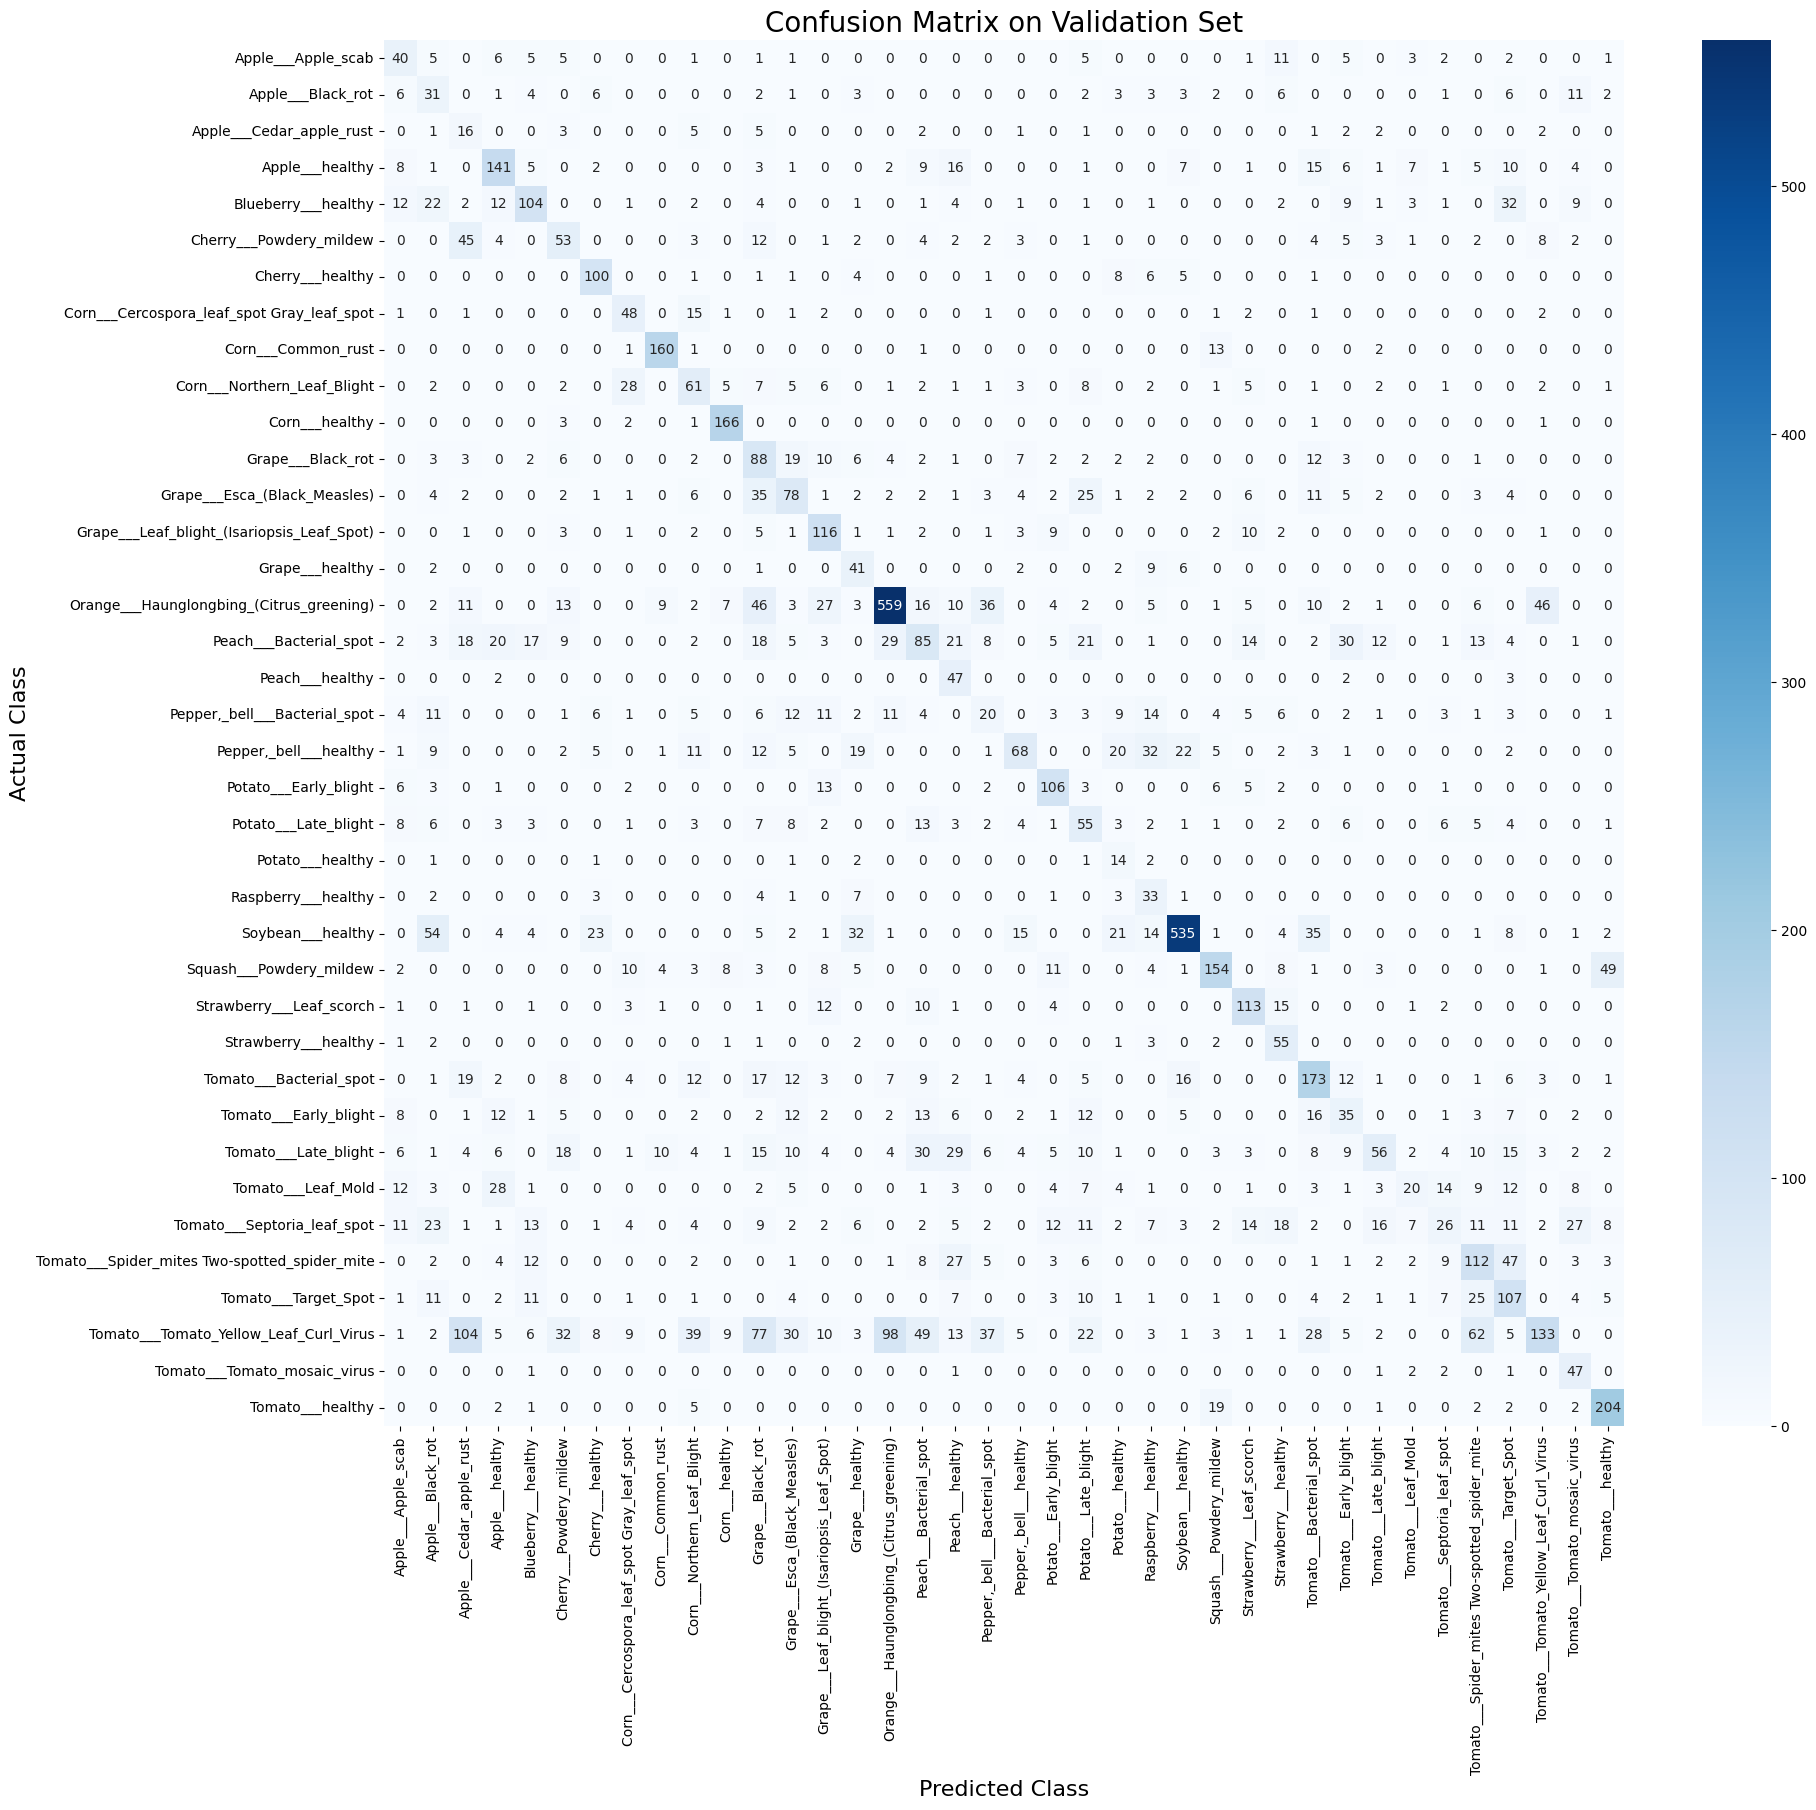

In [13]:
# 3️⃣ Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(20,18))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("Actual Class", fontsize=16)
plt.title("Confusion Matrix on Validation Set", fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
